# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import glob
import re

## Access Files

First step is to navigate to the `Rosenthal` folder under `gallina` and load all the files into an iglob iterator.

### Rosenthal Folder

In [2]:
print("Current directory:",os.getcwd())

Current directory: /mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/notebooks


In [3]:
# Check if the Rosenthal directory exists
ros_path = "/mnt/rds/redhen/gallina/Rosenthal/"
print("Directory exists:",os.path.isdir(ros_path))

# Check that the Rosenthal directory is not empty
ros_items = os.listdir(ros_path)
if len(ros_items)==0:
    print("Error! Directory is empty")
else:
    # If not empty print the subdirectories
    print("Items in directory:",ros_items)

True
['1972', '1978', '1985', '1961', '1982', '1988', '2006', '1975', '1971', '1962', '1986', '1981', '1976', '1974', '1983', '1960', '1984', '1979', '1973', '1977', '1980', '1987', '1969', '1963']


In [4]:
# Starting index of the file name (used to remove path info)
FILE_START_INDEX = 58

In [24]:
# Method to traverse through all of the iglob files recursively
def traverse_iglob(files):
    # Establish a counter variable to keep track of no of files.
    ctr=0
    # Maintain a list to extract only the file names
    files_split=[]
    
    # Loop through the iglob iterator and update the variables
    for file in files:
        print(file)
        ctr+=1
        file_split = file[FILE_START_INDEX:].split('_')
        files_split.append(file_split[0:5]+[file_split[-1]])
    return ctr,files_split

In [25]:
# Crete iglob iterator for all mp4 files
mp4_files = glob.iglob(ros_path+"**/*.mp4", recursive=True)

# Use method to extract file count and name
mp4_ctr, mp4_files_split = traverse_iglob(mp4_files)

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-23/1988-01-23_0000_US_00041128_B0_B36_MB11_E3_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-02/1988-01-02_0000_US_00041781_B0_B33_MB35_E9_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-27/1988-01-27_0000_US_00043431_B0_B33_MB57_E9_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-27/1988-01-27_0000_US_00041744_B0_B33_MB57_E9_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-15/1988-01-15_0000_US_00041127_B0_B6_M6_E6_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-12/1988-01-12_0000_US_00041202_B0_B46_M2_E7_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-18/1988-01-18_0000_US_00043331_B0_B36_MB11_E3_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-18/1988-01-18_0000_US_00041120_B0_B47_M4_E10_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-18/1988-01-18_0000_US_00043434_B0_B10_MB52_H19_SM.mp4
/mnt/rds/redhen/gallina/Rosenthal

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-21/1988-07-21_0000_US_NA018184_B14_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-21/1988-07-21_0000_US_NA047488_V0_VHS62_MB8_E23_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-21/1988-07-21_0000_US_00021598_B0_B10_MB52_H19_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-11/2006-12-11_0000_US_00018527_V4_VHS29_MB5_H7_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-11/2006-12-11_0000_US_00018530_V1_VHS23_MB22_E1_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-11/2006-12-11_0000_US_00018529_V2_VHS18_MB27_H11_JB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-11/2006-12-11_0000_US_00018522_V3_VHSP18_MB24_H1_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-11/2006-12-11_0000_US_00018527_V4_VHS35_MB41_H26_HL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-30/2006-12-30_0000_US_00018510_V3_VHSP20_MB23_H4_GM.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00002803_V11_MB1_VHS15_EB1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00002842_V8_M1_VHS9_H3_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00002803_V11_M2_VHS10_H4_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00000247_V6_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00002803_V11_MB13_VHS14_H13.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00000246_V7_M3_VHS11_H13_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00004023_V2_VHS40_MB34_H28_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00000247_V6_MB7_VHS7_H11_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-13/2006-10-13_0000_US_00002668_V10_MB7_VHS7_H11_CG.mp4
/mnt/rds/redhen/

/mnt/rds/redhen/gallina/Rosenthal/1983/1983-11/1983-11-02/1983-11-02_0000_US_00041522_B0_B37_MB49_H14_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-11/1983-11-24/1983-11-24_0000_US_00022342_B0_BP1_MB11_E3_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-11/1983-11-13/1983-11-13_0000_US_NA004279_B1_B66_MB59_H12_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1960/1960-11/1960-11-25/1960-11-25_0000_US_00010053_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1960/1960-01/1960-01-01/1960-01-01_0000_US_NA020246_B0_B58_M19_H30_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1960/1960-01/1960-01-01/1960-01-01_0000_US_NA020041_B0_B75_M42_H38_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-10/1984-10-10/1984-10-10_0000_US_00021776_B0_B7_MB48_H12_KZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-10/1984-10-06/1984-10-06_0000_US_00021555_B0_B49_MB42_E5_SM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-10/1984-10-06/1984-10-06_0000_US_00021555_B0_BP1_MB11_E3_SM.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-06/1987-01-06_0000_US_00043215_B0_B37_MB49_H14_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-15/1987-01-15_0000_US_00043100_B0_B33_MB57_E9_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-15/1987-01-15_0000_US_00010504_B0_B32_M10_E11_JS_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-27/1987-01-27_0000_US_NA011259_B0_B7_M35_E3_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-27/1987-01-27_0000_US_NA011257_B0_B64_M10_H44_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-27/1987-01-27_0000_US_NA011258_B0_B37_M37_H47_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-20/1987-01-20_0000_US_00043367_B0_B37_MB49_H14_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-01/1987-01-01_0000_US_00020432_U0_U2_M13_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-01/1987-01-01_0000_US_00021644_B0_B12_M6_E6_KZ.mp4
/mnt/rds/redhen/gallina/R

In [26]:
# Crete iglob iterator for all srt files
srt_files = glob.iglob(ros_path+"**/*.srt", recursive=True)

# Use method to extract file count and name
srt_ctr, srt_files_split = traverse_iglob(srt_files) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028660_B0_B49_MB42_E5_TL.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028656_B0_B49_MB42_E5_EO.srt
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00000548_V5_MB2_VHS2_H8_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00003965_V1_MB7_VHS7_H11_CG.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00003560_V3_VHSP25_MB27_H22_DA.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00001352_V4_VHS31_MB25_H13_NN.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00002750_V2_M2_VHS10_H4_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00000866_V10_MB3_VHS3_H9_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00000774_V12_VHSP1_MB18_H2_SA.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00001053_V1_MB13_VHS14_H1_GG.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-25/2006-05-25_0000_US_00000176_V11_M2_VHS10_H4_CG.srt
/mnt/rds/redh

/mnt/rds/redhen/gallina/Rosenthal/1984/1984-04/1984-04-01/1984-04-01_0000_US_00022034_B0_B7_MB48_H12_RX.srt
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-04/1984-04-01/1984-04-01_0000_US_NA020171_B0_BP3_M46_E1_HS.srt
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-29/1984-07-29_0000_US_NA020174_B0_B78_M22_E22_HS.srt
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-31/1984-07-31_0000_US_NA020175_B0_B37_M37_H47_HS.srt
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-31/1984-07-31_0000_US_NA020176_B0_B1_M41_E5_HS.srt
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-10/1984-07-10_0000_US_00043975_B0_B46_M2_E7_HC_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-05/1984-05-26/1984-05-26_0000_US_00021679_B0_BP2_MB46_H10_DB.srt
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-05/1984-05-07/1984-05-07_0000_US_00043046_B0_BP2_MB46_H10_KH_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-05/1984-05-07/1984-05-07_0000_US_00043991_B0_B33_MB57_E9_JA.srt
/mnt/rds/redhen/gallina/R

In [27]:
# Crete iglob iterator for all txt3 files
txt3_files = glob.iglob(ros_path+"**/*.txt3", recursive=True)

# Use method to extract file count and name
txt3_ctr, txt3_files_split = traverse_iglob(txt3_files) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.txt3
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-14/2006-10-14_0000_US_00000257_V7_MB12_VHS13_H2_MS.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-26/2006-10-26_0000_US_00018034_V11_VHS5_MB5_H7_CC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-26/2006-10-26_0000_US_00018031_V4_VHSP9_MB27_H11_CC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-26/2006-10-26_0000_US_00018035_V12_VHSP16_MB10_H10_CC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-26/2006-10-26_0000_US_00018030_V3_VHSP6_MB11_E2_SC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-26/2006-10-26_0000_US_00018028_V1_VHS23_MB22_E1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-26/2006-10-26_0000_US_00018029_V2_VHS16_MB13_H15_SC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-26/2006-10-26_0000_US_00018036_V13_VHS15_MB4_H12_CC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-26/2006-10-26_0000_US_00018035_V12_VHSP16_MB43_H23_M

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-26/1980-11-26_0000_US_NA020733_B0_B33_M40_H14_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-26/1980-11-26_0000_US_NA020765_B0_B37_M37_H47_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-14/1980-11-14_0000_US_NA000086_B0_B58_M39_E15_BZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-14/1980-11-14_0000_US_NA020303_B0_B10_M43_E6_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-14/1980-11-14_0000_US_NA020572_B0_B12_M21_H40_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-07/1980-11-07_0000_US_NA020301_B0_B10_M43_E6_CF.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-19/1980-11-19_0000_US_NA000093_B1_B47_MB16_E10_BZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-13/1980-11-13_0000_US_NA020729_B0_B58_M19_H30_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-21/1980-11-21_0000_US_NA000097_B2_B12_M43_E6_LA_BE.txt3
/mnt/rds/redhen/ga

## Count File Types

In [28]:
# Number of mp4 files in the Rosenthal collection
mp4_ctr

6920

In [29]:
# Number of srt files in the Rosenthal collection
srt_ctr

4543

In [30]:
# Number of txt3 files in the Rosenthal collection
txt3_ctr

6928

<BarContainer object of 3 artists>

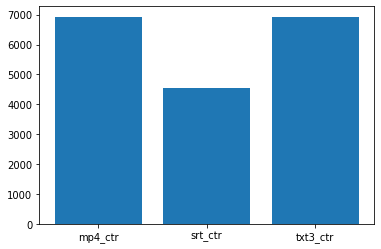

In [31]:
# Bar plot for visualizing the count of various file types
# X-axis: File Type
# Y-axis: Count
plt.bar(["mp4_ctr","srt_ctr","txt3_ctr"], [mp4_ctr,srt_ctr,txt3_ctr])

## Basic Metadata

In [12]:
# Constant label values which are extracted from the file name
COLUMN_LABELS = ['Pull Date','TODO','Lang','Barcode','V No.','File Type']

In [48]:
# Create pandas DataFrame for all mp4 files
mp4_df = pd.DataFrame(mp4_files_split, columns=COLUMN_LABELS)
mp4_df

,Pull Date,TODO,Lang,Barcode,V No.,File Type
0,1972-07-01,0000,US,00010144,V0,DB.mp4
1,1972-10-06,0000,US,00016471,V0,JS.mp4
2,1972-10-06,0000,US,00015980,V1,JS.mp4
3,1972-09-14,0000,US,00025933,B0,KC.mp4
4,1972-09-01,0000,US,00016359,V0,WR.mp4
...,...,...,...,...,...,...
6915,1987-06-09,0000,US,00021650,B0,KQ.mp4
6916,1987-06-22,0000,US,00043099,B0,KH.mp4
6917,1987-06-10,0000,US,NA012366,B0,MM.mp4
6918,1969-03-21,0000,US,00010209,V0,DB.mp4


In [14]:
# Create pandas DataFrame for all srt files
srt_df = pd.DataFrame(srt_files_split, columns=COLUMN_LABELS)
srt_df

,Pull Date,TODO,Lang,Barcode,V No.,File Type
0,1972-10-06,0000,US,00015980,V1,JS.srt
1,1972-10-06,0000,US,00016471,V0,JS.srt
2,1972-09-14,0000,US,00025933,B0,KC.srt
3,1972-09-01,0000,US,00016359,V0,WR.srt
4,1972-06-20,0000,US,00019724,B3,WR.srt
...,...,...,...,...,...,...
4502,1987-06-04,0000,US,00022777,B0,HM.srt
4503,1987-06-04,0000,US,NA012623,B0,MM.srt
4504,1987-06-09,0000,US,00021650,B0,KQ.srt
4505,1987-06-10,0000,US,NA012366,B0,MM.srt


In [15]:
# Create pandas DataFrame for all txt3 files
txt3_df = pd.DataFrame(txt3_files_split, columns=COLUMN_LABELS)
txt3_df

,Pull Date,TODO,Lang,Barcode,V No.,File Type
0,1972-07-01,0000,US,00010144,V0,DB.txt3
1,1972-10-06,0000,US,00015980,V1,JS.txt3
2,1972-10-06,0000,US,00016471,V0,JS.txt3
3,1972-09-14,0000,US,00025933,B0,KC.txt3
4,1972-09-01,0000,US,00016359,V0,WR.txt3
...,...,...,...,...,...,...
6878,1987-06-09,0000,US,00021650,B0,KQ.txt3
6879,1987-06-22,0000,US,00043099,B0,KH.txt3
6880,1987-06-10,0000,US,NA012366,B0,MM.txt3
6881,1969-03-21,0000,US,00010209,V0,DB.txt3


### V No. Bar Plot

In [20]:
# Method to plot bar chart based on V No.
def v_bar_plot(df,title):
    ax = df['V No.'].value_counts().plot(kind='bar', figsize=(15,8), title=title)

    ax.set_xlabel("V No.")
    ax.set_ylabel("Freequency")

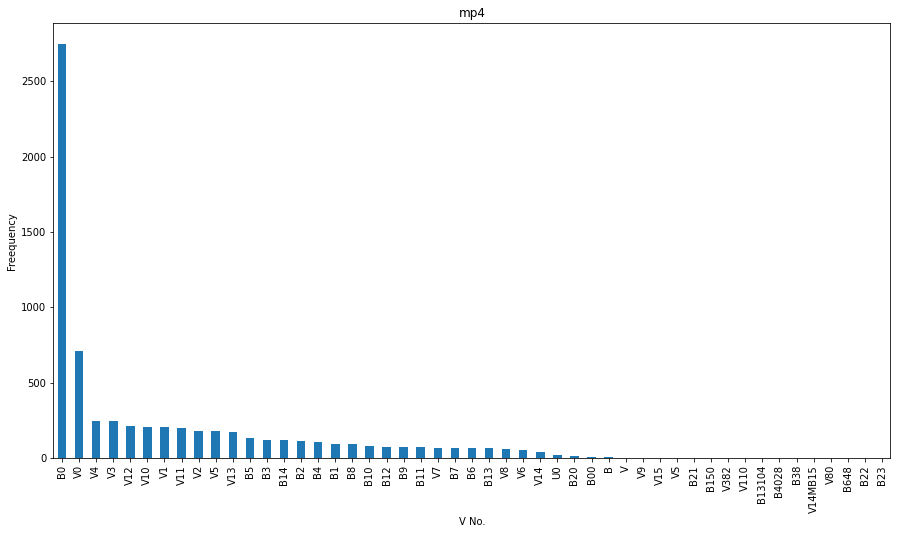

In [21]:
# Plots a bar chart for V No.
# X-Axis = V No.
# Y-Axis = Frequency
v_bar_plot(mp4_df,'mp4')

### Phase 1 V No. Count

In [46]:
mp4_series = mp4_df['V No.'].value_counts()
mp4_series

B0         2748
V0          708
V4          246
V3          243
V12         214
V10         209
V1          208
V11         197
V2          178
V5          178
V13         173
B5          132
B3          122
B14         122
B2          114
B4          109
B1           94
B8           90
B10          77
B12          76
B9           75
B11          72
V7           69
B7           68
B6           67
B13          64
V8           62
V6           52
V14          42
U0           23
B20          13
B00           4
B             4
V             3
V9            3
V15           2
VS            2
B21           2
B150          1
V382          1
V110          1
B13104        1
B4028         1
B38           1
V14MB15       1
V80           1
B648          1
B22           1
B23           1
Name: V No., dtype: int64